In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('/content/drive/MyDrive/MLOps PI/df_f.csv', index_col='Unnamed: 0')
df.head(3)

,belongs_to_collection,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,...,g1,g2,g3,produc_com1,produc_com2,country,language,release_year,return,name
0,Toy Story Collection,30000000,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,...,Animation,Comedy,Family,Pixar Animation Studios,NaN,United States of America,English,1995.0,12.451801,John Lasseter
1,NaN,65000000,8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Released,...,Adventure,Fantasy,Family,TriStar Pictures,Teitler Film,United States of America,Français,1995.0,4.043035,Joe Johnston
2,Grumpy Old Men Collection,0,15602,en,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,0.0,101.0,Released,...,Romance,Comedy,NaN,Warner Bros.,Lancaster Gate,United States of America,English,1995.0,NaN,Howard Deutch


In [17]:
df.describe(include='all')

,belongs_to_collection,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,...,g1,g2,g3,produc_com1,produc_com2,country,language,release_year,return,name
count,5149,4.907800e+04,49078.000000,49063,48147,49078.000000,49078,4.907800e+04,48853.000000,49011,...,46764,30815,15191,36681,18618,42775,44990,49078.000000,5.848000e+03,49078
unique,1686,NaN,NaN,89,43476,NaN,17220,NaN,NaN,6,...,20,20,20,10548,9039,140,71,NaN,NaN,19712
top,The ABCs of Death Collection,NaN,NaN,en,No overview found.,NaN,2008-01-01,NaN,NaN,Released,...,Drama,Drama,Thriller,Paramount Pictures,Warner Bros.,United States of America,English,NaN,NaN,John Ford
freq,87,NaN,NaN,34746,141,NaN,150,NaN,NaN,48632,...,12514,6782,2337,1042,281,22169,25680,NaN,NaN,68
mean,NaN,4.304599e+06,108037.644810,NaN,NaN,2.984225,NaN,1.159781e+07,94.649622,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1991.944130,5.123049e+03,NaN
std,NaN,1.777085e+07,112278.069383,NaN,NaN,6.558251,NaN,6.626873e+07,41.623446,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.252204,2.080217e+05,NaN
min,NaN,0.000000e+00,2.000000,NaN,NaN,0.000000,NaN,0.000000e+00,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1874.000000,5.217391e-07,NaN
25%,NaN,0.000000e+00,26298.000000,NaN,NaN,0.407143,NaN,0.000000e+00,85.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1978.000000,7.958246e-01,NaN
50%,NaN,0.000000e+00,59736.500000,NaN,NaN,1.164274,NaN,0.000000e+00,94.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001.000000,2.088842e+00,NaN
75%,NaN,0.000000e+00,156932.000000,NaN,NaN,3.783345,NaN,0.000000e+00,106.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.000000,4.333665e+00,NaN


In [18]:
df.dtypes

belongs_to_collection     object
budget                     int64
id                         int64
original_language         object
overview                  object
popularity               float64
release_date              object
revenue                  float64
runtime                  float64
status                    object
tagline                   object
title                     object
vote_average             float64
vote_count               float64
g1                        object
g2                        object
g3                        object
produc_com1               object
produc_com2               object
country                   object
language                  object
release_year             float64
return                   float64
name                      object
dtype: object

In [19]:
df['g1'].value_counts()

Drama              12514
Comedy              9518
Action              4822
Documentary         4029
Horror              2950
Thriller            1755
Crime               1735
Adventure           1667
Animation           1533
Romance             1257
Fantasy              834
Science Fiction      708
Mystery              590
Family               587
Music                549
Western              470
War                  412
TV Movie             403
History              309
Foreign              122
Name: g1, dtype: int64

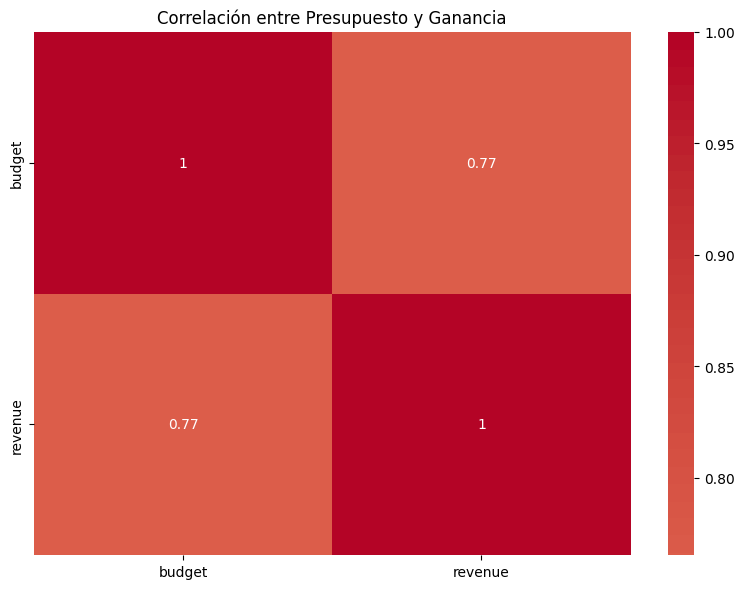

In [20]:
correlation_matrix = df[['budget', 'revenue']].corr()


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

plt.title('Correlación entre Presupuesto y Ganancia')


plt.tight_layout()
plt.show()

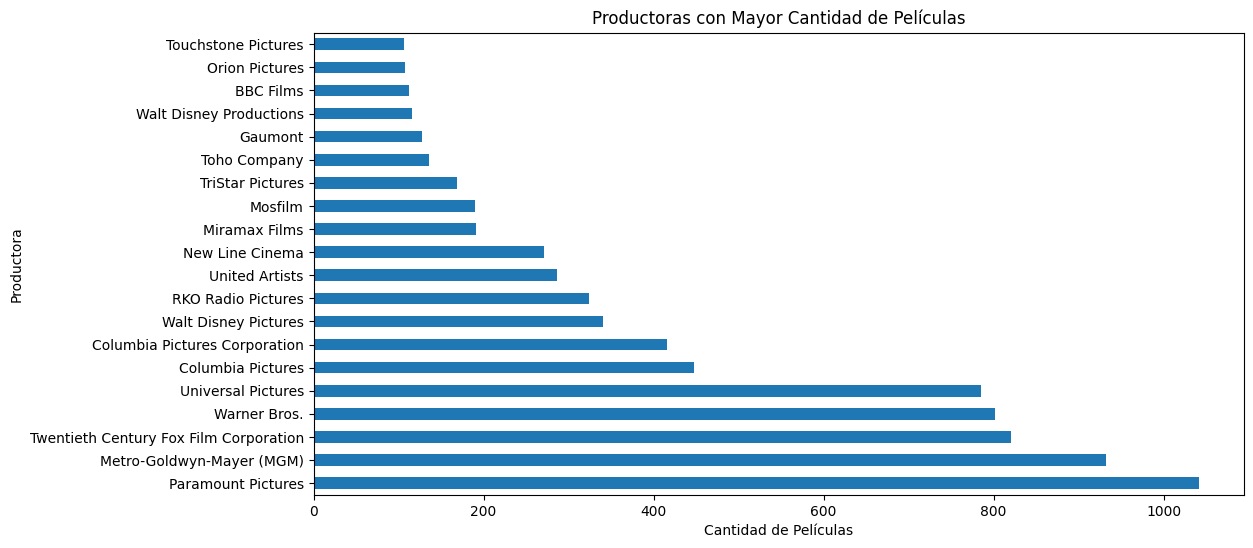

In [21]:
productora_counts = df['produc_com1'].value_counts()

# Seleccionamos las productoras con la mayor cantidad de películas, en este caso 20
top_productoras = productora_counts.head(20)

plt.figure(figsize=(12, 6))
top_productoras.plot(kind='barh')

plt.title('Productoras con Mayor Cantidad de Películas')
plt.xlabel('Cantidad de Películas')
plt.ylabel('Productora')

plt.show()

Agrupo la popularidad promedio por cada genero y los ordeno de manera descendente para que se vea mejor en la grafica y notamos como el genero más popular es el de 'Adventure'

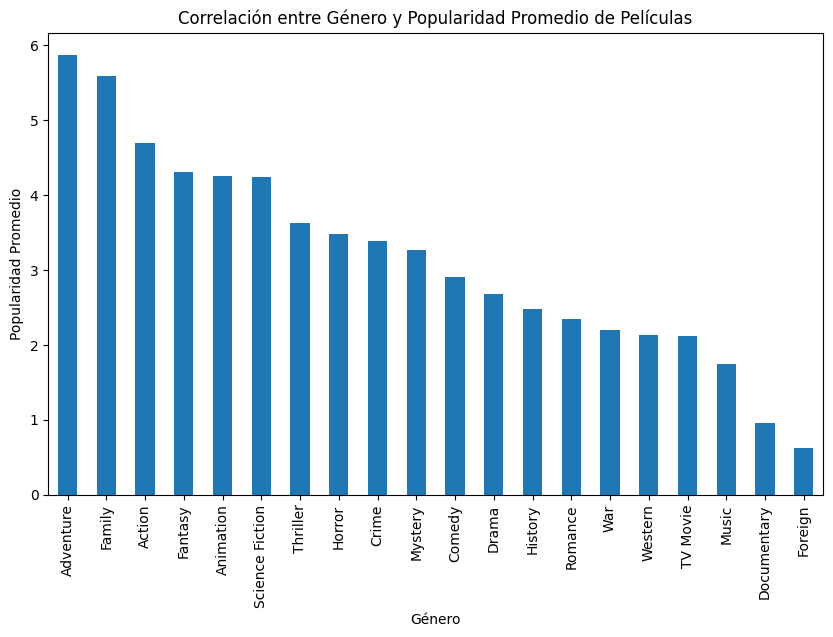

In [22]:
popularidad_promedio_por_genero = df.groupby('g1')['popularity'].mean()
popularidad_promedio_por_genero = popularidad_promedio_por_genero.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
popularidad_promedio_por_genero.plot(kind='bar')

plt.title('Correlación entre Género y Popularidad Promedio de Películas')
plt.xlabel('Género')
plt.ylabel('Popularidad Promedio')

plt.show()

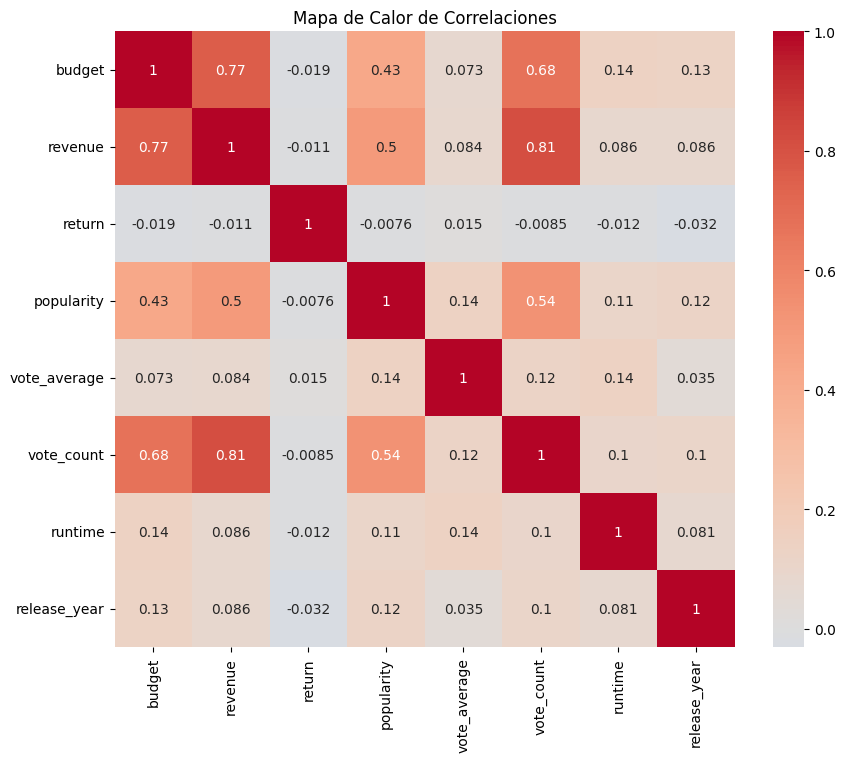

In [24]:
# Selecciona las variables cuantitativas
ColumnasCuantitativas = df[['budget', 'revenue', 'return', 'popularity', 'vote_average', 'vote_count', 'runtime', 'release_year']]

# Calcula la matriz de correlación
correlation_matrix = ColumnasCuantitativas.corr()

# Crea un mapa de calor para visualizar las correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Mapa de Calor de Correlaciones')
plt.show()

No se observa ninguna correlación significativa.